# Data Visualization Assignment: Online Retail Analysis

## Assignment Information
- **Course**: IIMK's Professional Certificate in Data Science and Artificial Intelligence for Managers
- **Student Name**: Lalit Nayyar
- **Email ID**: lalitnayyar@gmail.com
- **Assignment**: Required Assignment 5.2 : Applying Data Visualisation Principles
- **Submission Date**: May 11, 2025

## Introduction
This notebook demonstrates the application of data visualization principles to analyze an online retail dataset. We'll focus on creating clear, effective visualizations for non-technical stakeholders following the 4C's principles:
- Clear: Easy to understand and interpret
- Clean: Minimal clutter and distractions
- Concise: Focused on key information
- Captivating: Visually engaging and memorable

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style for better visualizations
plt.style.use('bmh')  # Using a built-in style that works well for business presentations
sns.set_palette('husl')

# Read the dataset
df = pd.read_excel('Online Retail Data Set.xlsx')

print(f"Dataset loaded successfully with {len(df)} rows")

Dataset loaded successfully with 541909 rows


## Data Preprocessing
Before creating visualizations, we'll clean and prepare our data to ensure accurate insights.

In [2]:
# Calculate total sales
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove cancelled orders (those starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove any negative quantities or prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

print(f"After cleaning, dataset has {len(df)} rows")

After cleaning, dataset has 530104 rows


## Chart 1: Monthly Sales Trends

For the monthly sales trends, we'll use a line chart with markers. This choice follows the 4C's principles:
- Clear: Line charts are intuitive for showing trends over time
- Clean: Minimal gridlines and clear labeling
- Concise: Focus on the trend line without unnecessary elements
- Captivating: Use of appropriate colors and markers for emphasis

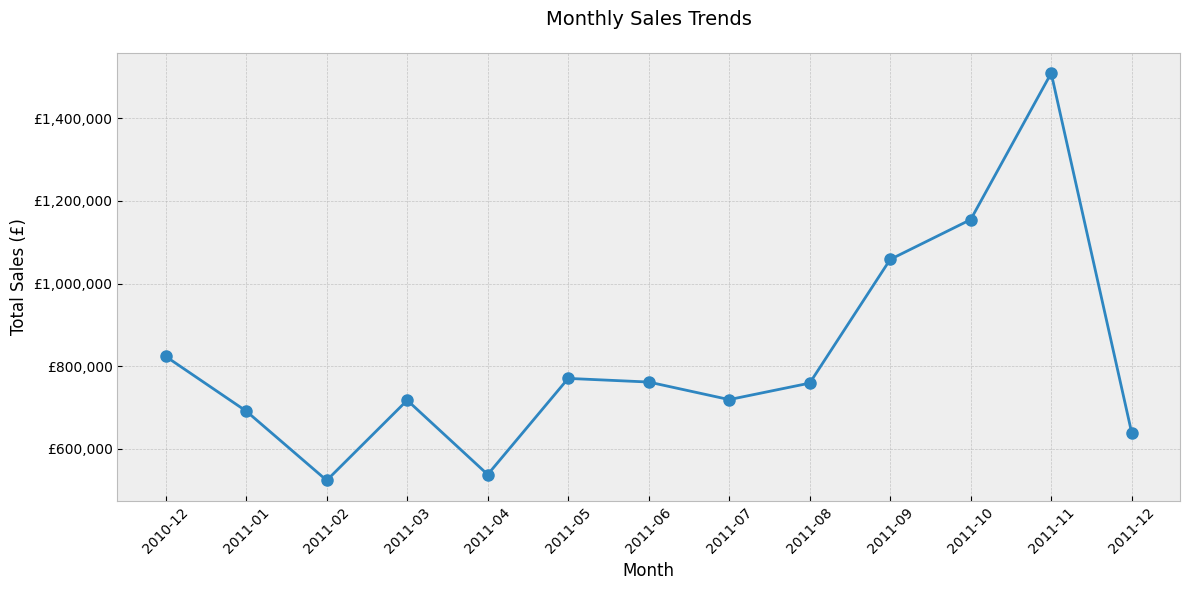

In [3]:
# Prepare monthly sales data
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].astype(str)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Sales'], 
         marker='o', linewidth=2, markersize=8, color='#2E86C1')

# Customize the plot
plt.title('Monthly Sales Trends', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Add thousand separator to y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{int(x):,}'))

plt.tight_layout()
plt.show()

## Chart 2: Country-wise Sales Distribution

For the country-wise sales distribution, we'll use a horizontal bar chart. This choice aligns with the 4C's:
- Clear: Bars make it easy to compare values across categories
- Clean: Countries are sorted by sales for better readability
- Concise: Focus on top countries to avoid information overload
- Captivating: Use of color gradient to enhance visual appeal

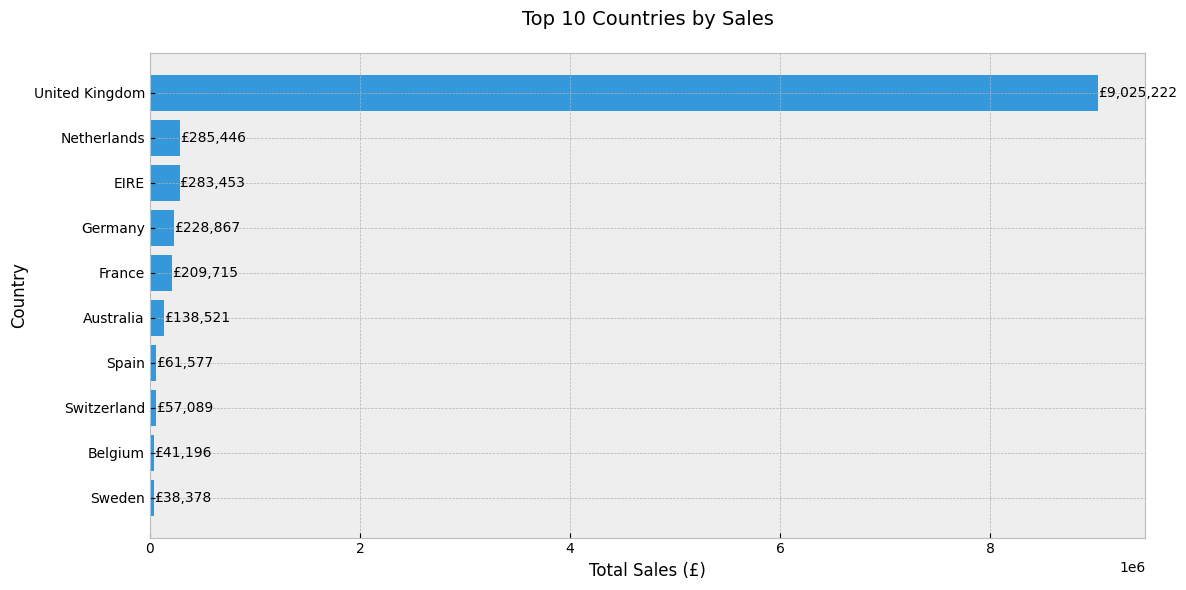

In [4]:
# Prepare country-wise sales data
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=True)
top_countries = country_sales.tail(10)  # Show top 10 countries

# Create horizontal bar plot
plt.figure(figsize=(12, 6))

# Create bars with a single color for better clarity
bars = plt.barh(range(len(top_countries)), top_countries.values, color='#3498DB')

# Customize the plot
plt.title('Top 10 Countries by Sales', fontsize=14, pad=20)
plt.xlabel('Total Sales (£)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.yticks(range(len(top_countries)), top_countries.index)

# Add value labels on bars
for i, v in enumerate(top_countries.values):
    plt.text(v, i, f'£{int(v):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Explanation of Visualization Choices

### Monthly Sales Trends (Line Chart)
- The line chart effectively shows the temporal progression of sales
- Markers highlight specific data points for easy reference
- Grid lines help track values across the chart
- Clear labeling and formatting make the numbers easily readable
- Used a professional blue color (#2E86C1) for better visibility and business context

### Country-wise Sales Distribution (Horizontal Bar Chart)
- Horizontal bars work well for categorical data with long labels (country names)
- Sorting by value helps identify top performers at a glance
- Used a consistent color scheme (#3498DB) for professional appearance
- Direct labeling of values eliminates the need for precise grid lines

Both visualizations follow the 4C's principles while being accessible to non-technical stakeholders. The charts avoid complex statistical terminology and focus on presenting the data in an immediately understandable format.